# Example of SVM using Guassian Kernel:

#### Sathvik B - 1MS17CS148
#### Sathvik K P - 1MS17CS143

### Import necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#### Import data from csv file

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

#### Check for null values in the data

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### 'Id' and 'Unnamed: 32' are unnecessary attributes, so we drop them

In [6]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [7]:
y=df.diagnosis

### Graph of number of malignant and begign tumor cases in the dataset

Number of Benign:  357
Number of Malignant :  212


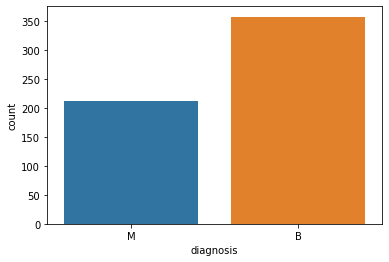

In [8]:
ax = sns.countplot(y,label="Count")       
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

### Convert the categorical attribute into target integer attribute

In [9]:
df['target'] = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [10]:
df.drop(['diagnosis'],axis=1,inplace=True)

In [11]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Draw the correlation matrix

In [12]:
corr_matrix = df.corr()
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


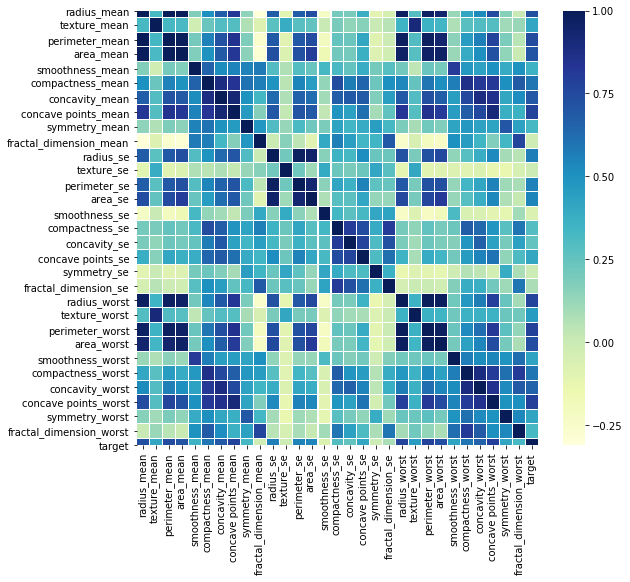

In [13]:
fig, ax = plt.subplots(figsize = (9,8))
sns.heatmap(corr_matrix, ax=ax, cmap='YlGnBu', linewidths=0.1)

### Split into X and y and training and testing datasets

In [14]:
y=df['target']
X=df.drop(['target'],axis=1)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 43)

### Make a SVM classifier with guassian kernel and fit the training data

In [16]:

# Make and fit SVMs with Gaussian Kernel
svm = SVC(kernel="rbf", gamma="auto", C=1)
svm.fit(X_train, y_train)
pred_vals = svm.predict(X_test)

### Testing Accuracy is: 

In [17]:
print(accuracy_score(y_test,pred_vals))

0.6578947368421053


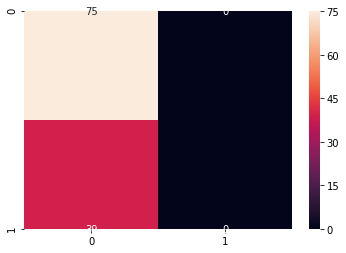

In [18]:
cm = confusion_matrix(y_test, pred_vals)
sns.heatmap(cm,annot=True)

### As we can see, the accuracy is not very good hence, we normalize the dataframe to get better results

In [19]:
scaler = StandardScaler()
df[['radius_mean']] = scaler.fit_transform(df[['radius_mean']])

In [20]:
df[['texture_mean']] = scaler.fit_transform(df[['texture_mean']])
df[['perimeter_mean']] = scaler.fit_transform(df[['perimeter_mean']])
df[['area_mean']] = scaler.fit_transform(df[['area_mean']])
df[['smoothness_mean']] = scaler.fit_transform(df[['smoothness_mean']])
df[['compactness_mean']] = scaler.fit_transform(df[['compactness_mean']])
df[['concavity_mean']] = scaler.fit_transform(df[['concavity_mean']])
df[['concave points_mean']] = scaler.fit_transform(df[['concave points_mean']])
df[['symmetry_mean']] = scaler.fit_transform(df[['symmetry_mean']])
df[['fractal_dimension_mean']] = scaler.fit_transform(df[['fractal_dimension_mean']])
df[['radius_se']] = scaler.fit_transform(df[['radius_se']])
df[['texture_se']] = scaler.fit_transform(df[['texture_se']])
df[['perimeter_se']] = scaler.fit_transform(df[['perimeter_se']])
df[['area_se']] = scaler.fit_transform(df[['area_se']])
df[['smoothness_se']] = scaler.fit_transform(df[['smoothness_se']])
df[['compactness_se']] = scaler.fit_transform(df[['compactness_se']])
df[['concavity_se']] = scaler.fit_transform(df[['concavity_se']])
df[['concave points_se']] = scaler.fit_transform(df[['concave points_se']])
df[['symmetry_se']] = scaler.fit_transform(df[['symmetry_se']])
df[['fractal_dimension_se']] = scaler.fit_transform(df[['fractal_dimension_se']])
df[['radius_worst']] = scaler.fit_transform(df[['radius_worst']])
df[['texture_worst']] = scaler.fit_transform(df[['texture_worst']])
df[['perimeter_worst']] = scaler.fit_transform(df[['radius_mean']])
df[['area_worst']] = scaler.fit_transform(df[['area_worst']])
df[['smoothness_worst']] = scaler.fit_transform(df[['smoothness_worst']])
df[['compactness_worst']] = scaler.fit_transform(df[['compactness_worst']])
df[['concavity_worst']] = scaler.fit_transform(df[['concavity_worst']])
df[['concave points_worst']] = scaler.fit_transform(df[['concave points_worst']])
df[['symmetry_worst']] = scaler.fit_transform(df[['symmetry_worst']])
df[['fractal_dimension_worst']] = scaler.fit_transform(df[['fractal_dimension_worst']])

In [21]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,1.097064,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.829821,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.579888,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.768909,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.750297,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


### Again, splitting into X and y And training the model

In [22]:
y=df['target']
X=df.drop(['target'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 43)

In [23]:

# Make and fit SVMs with Gaussian Kernel
svm = SVC(kernel="rbf", gamma="auto", C=1)
svm.fit(X_train, y_train)
pred_vals = svm.predict(X_test)

### Accuracy score and confusion matrix:

In [24]:
print(accuracy_score(y_test,pred_vals))

0.956140350877193


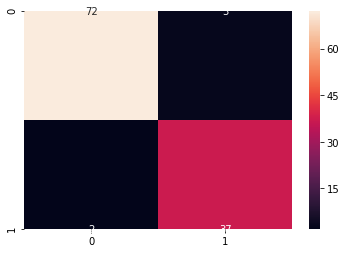

In [25]:
cm = confusion_matrix(y_test, pred_vals)
sns.heatmap(cm,annot=True)

## As we can see, just by normalizing the data, we get a Huge increase in accuracy, from 65% to 95%. Thus the SVM classifier with a guassian kernel has fit the dataset well.